In [1]:
import random
import numpy as np
from itertools import product
from PIL import Image
from matplotlib import pyplot as plt

В данной части лабораторной работы предлагается реализовать метод главных компонент для сокращения
размерности даннных. В качестве данных предлагаются изображения с лицами людей.

Для выполнения этой работы необходимо заполнить код в следующих фукнциях:
1. `pca` - реализует алгоритм метода главных компонент.
2. `project_data` - проецирует данные в пространство с базисом, заданным матрицей перехода.
3. `recover_data` - восстанавливает спроецированные данные.

In [2]:
def load_data(data_file_path):

    # Функция для загрузки данных.
    # Принимает на вход путь к файлу.
    # Возвращает матрицу данных.

    with open(data_file_path) as input_file:
        X = list()
        for line in input_file:
            row = list(map(float, line.split(',')))
            X.append(row)
        return np.array(X, float)

In [3]:
def pca(X, k):

    # Функция, реализующая алгоритм метода главных компонент. Принимает на вход матрицу данных X и
    # число главных компонент k.
    # Должна возвращать k главных компонент в виде матрицы (главные компоненты - столбцы) и долю сохраненной дисперсии.
    
    X = X - X.mean(axis=0)  # центрирование признаков
    cov_matrix = np.cov(X, rowvar=False)  # матрица ковариации
    
    eig_val, eig_vec = np.linalg.eig(cov_matrix)  # собственные значения и векторы
    
    # Сортировка собственных векторов по наибольшему собственному значению
    eig_val = eig_val[eig_val.argsort()[::-1]]
    eig_vec = eig_vec[:, eig_val.argsort()[::-1]]
    
    U = eig_vec[:, :k]  # матрица k главных компонент
    saved_disp = np.sum(eig_val[:k]) / np.sum(eig_val)  # доля сохранненой дисперсии после преобразования
    
    return U, saved_disp

In [4]:
def project_data(X, U):

    # Функция для проекции данных в пространство с базисом, заданным матрицей U.
    # Принимает матрицу данных X и матрицу U, задающую базис пространства.
    # Должна возвращать новую матрицу данных, где все точки спроецированны в заданное пространство.
    
    Xp = X @ U

    return Xp

In [5]:
def recover_data(Xp, U):

    # Функция для проекции данных из пространства с базисом, заданным матрицей U, в базис ijk.
    # Принимает матрицу данных Xp и матрицу U, задающую базис пространства.
    # Должна возвращать новую матрицу данных, где все точки спроецированны из заданного пространства,
    # в пространство с базисом ijk.
    
    X_rec = Xp @ U.T

    return X_rec

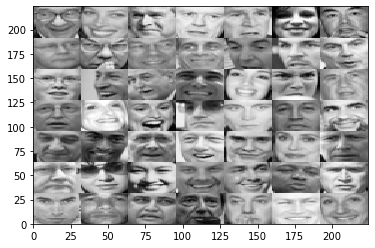

Доля сохраненной дисперсии (должна быть ~0.895 при K = 64): 0.8946808356207997


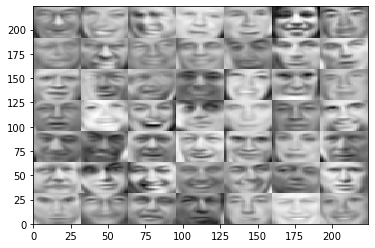

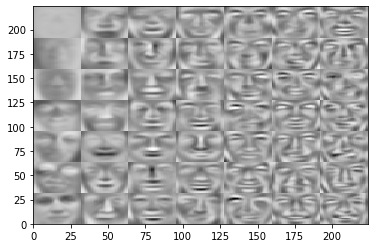

In [6]:
X = load_data('../data/ml/pca/faces.txt')

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = -X[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()

K = 64  # количество главных компонент, можно поварьировать

U, disp = pca(X, K)
print('Доля сохраненной дисперсии (должна быть ~0.895 при K = 64):', disp)

Xp = project_data(X, U)
X_rec = recover_data(Xp, U)

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = -X_rec[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = U.transpose()[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()